<a href="https://colab.research.google.com/github/yohanesnuwara/computational-geophysics/blob/master/seismic/seis_attribute_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install segyio

     |████████████████████████████████| 92kB 3.6MB/s 


In [3]:
import segyio

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!git clone https://github.com/yohanesnuwara/computational-geophysics

Cloning into 'computational-geophysics'...
remote: Enumerating objects: 430, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 430 (delta 123), reused 0 (delta 0), pack-reused 237
Receiving objects: 100% (430/430), 33.45 MiB | 29.71 MiB/s, done.
Resolving deltas: 100% (244/244), done.


In [6]:
import sys
sys.path.append('/content/computational-geophysics/seismic')

In [7]:
!git clone https://github.com/yohanesnuwara/d2geo

Cloning into 'd2geo'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 112 (delta 26), reused 14 (delta 0), pack-reused 52
Receiving objects: 100% (112/112), 52.57 KiB | 5.26 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [8]:
import sys
sys.path.append('/content/d2geo/attributes')

# Read Data 3D

In [9]:
filename = '/content/drive/My Drive/Public geoscience Data/Dutch F3 seismic data/Dutch Government_F3_entire_8bit seismic.segy'

In [10]:
import segyio

with segyio.open(filename) as f:

  data = segyio.tools.cube(f)
  inline_data = f.iline
  crossline_data = f.xline

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples
  sample_rate = segyio.tools.dt(f) / 1000
  print('Inline range from', inlines[0], 'to', inlines[-1])
  print('Crossline range from', crosslines[0], 'to', crosslines[-1])
  print('TWT from', twt[0], 'to', twt[-1])   
  print('Sample rate:', sample_rate, 'ms')

  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 100 to 750
Crossline range from 300 to 1250
TWT from 4.0 to 1848.0
Sample rate: 4.0 ms


'The 99th percentile is 6517; the max amplitude is 32767'

# Test Class Amplitude Attributes (Output 2D)

In [11]:
from seis_attribute import compute_attribute, display_attribute

## Inline tests

In [29]:
result = compute_attribute(cube=data, output='2d', type='il', inline_loc=400, 
                           inline_array=inlines, attribute_class='CompleTrace', 
                           attribute_type='enve')
result

dask.array<_trim, shape=(1, 462, 951), dtype=float32, chunksize=(1, 461, 461), chunktype=numpy.ndarray>

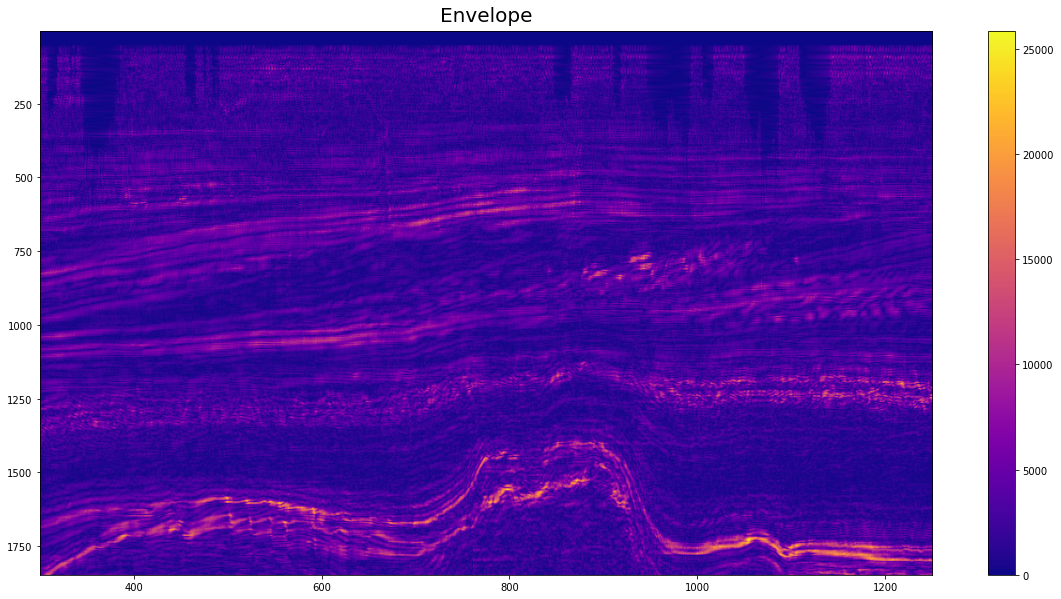

In [30]:
plt.figure(figsize=(20,10))
display_attribute(result, 'il', crosslines, twt, 'plasma', None, None)
plt.title('Envelope', size=20, pad=10)
plt.show()

## Crossline Tests


In [31]:
result = compute_attribute(cube=data, output='2d', type='xl', inline_loc=1200, 
                           xline_array=crosslines, attribute_class='CompleTrace', 
                           attribute_type='enve')
result

dask.array<_trim, shape=(1, 462, 651), dtype=float32, chunksize=(1, 461, 461), chunktype=numpy.ndarray>

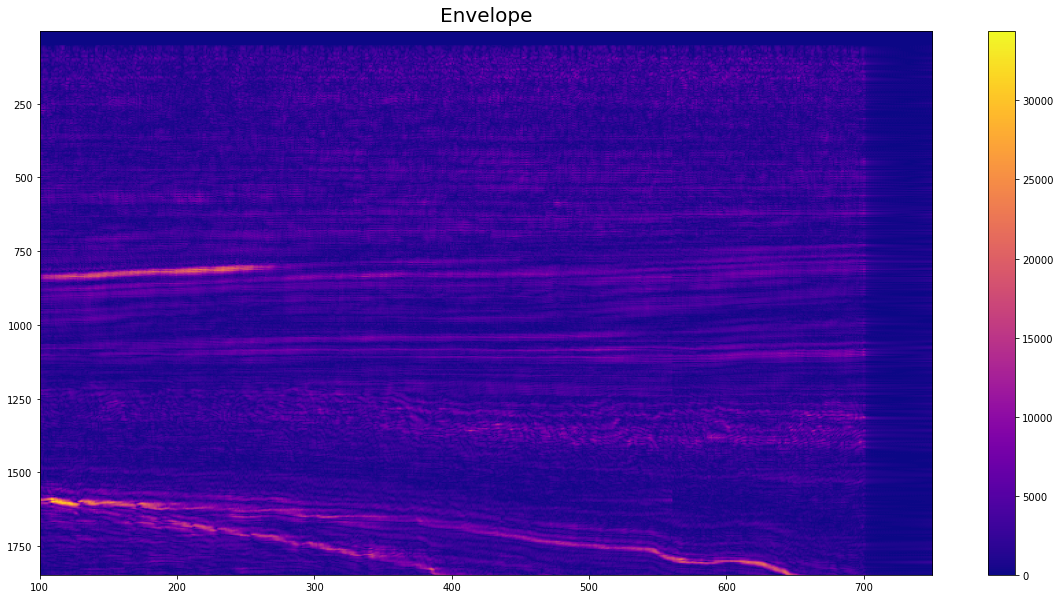

In [32]:
plt.figure(figsize=(20,10))
display_attribute(result, 'xl', inlines, twt, 'plasma', None, None)
plt.title('Envelope', size=20, pad=10)
plt.show()

## Timeslice Tests

In [24]:
result = compute_attribute(cube=data, output='2d', type='ts', timeslice_loc=1624, 
                           timeslice_array=twt, attribute_class='CompleTrace', 
                           attribute_type='enve')
result

dask.array<_trim, shape=(1, 651, 951), dtype=float32, chunksize=(1, 650, 650), chunktype=numpy.ndarray>

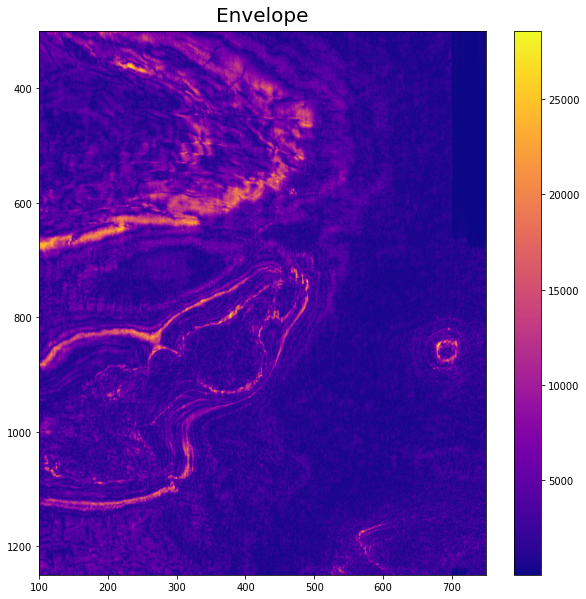

In [28]:
plt.figure(figsize=(10,10))
display_attribute(result, 'ts', inlines, crosslines, 'plasma', None, None)
plt.title('Envelope', size=20, pad=10)
plt.show()

# Test Class Amplitude Attributes (Output 3D)

In [18]:
result = compute_attribute(cube=data, output='3d', type='il', inline_loc=400, attribute_class='CompleTrace', attribute_type='enve')
result

dask.array<_trim, shape=(651, 951, 462), dtype=float32, chunksize=(305, 305, 462), chunktype=numpy.ndarray>